In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [3]:
forest_data = pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
from sklearn.preprocessing import LabelEncoder
forest_data=forest_data.apply(LabelEncoder().fit_transform)

In [5]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,1,0,0,0,0,1
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
data = forest_data.values
data

array([[ 7,  0, 28, ...,  0,  0,  1],
       [10,  5, 56, ...,  1,  0,  1],
       [10,  2, 56, ...,  1,  0,  1],
       ...,
       [ 1,  3,  9, ...,  0,  0,  0],
       [ 1,  2, 92, ...,  0,  0,  1],
       [ 9,  5,  7, ...,  0,  0,  1]], dtype=int64)

In [7]:
x =  data[:,0:-1]
y = data[:,-1]

In [8]:
x

array([[ 7,  0, 28, ...,  0,  0,  0],
       [10,  5, 56, ...,  0,  1,  0],
       [10,  2, 56, ...,  0,  1,  0],
       ...,
       [ 1,  3,  9, ...,  0,  0,  0],
       [ 1,  2, 92, ...,  0,  0,  0],
       [ 9,  5,  7, ...,  1,  0,  0]], dtype=int64)

In [9]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.33)

In [11]:
model = Sequential()
model.add(Dense(50, input_dim=30, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid')) 

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
hist = model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10) 

Epoch 1/150
35/35 [==============================] - 2s 11ms/step - loss: 0.4309 - acc: 0.8353 - val_loss: 0.2546 - val_acc: 0.8713
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.1094 - acc: 0.9595 - val_loss: 0.1432 - val_acc: 0.9415
Epoch 3/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0697 - acc: 0.9740 - val_loss: 0.2268 - val_acc: 0.9006
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0653 - acc: 0.9827 - val_loss: 0.1244 - val_acc: 0.9415
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0559 - acc: 0.9769 - val_loss: 0.2717 - val_acc: 0.8830
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0574 - acc: 0.9740 - val_loss: 0.2696 - val_acc: 0.8772
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0611 - acc: 0.9769 - val_loss: 0.1756 - val_acc: 0.9181
Epoch 8/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0510 - 

35/35 [==============================] - 0s 3ms/step - loss: 0.0427 - acc: 0.9827 - val_loss: 0.3640 - val_acc: 0.9240
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0175 - acc: 0.9884 - val_loss: 0.2830 - val_acc: 0.9415
Epoch 65/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0252 - acc: 0.9884 - val_loss: 0.2330 - val_acc: 0.9357
Epoch 66/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0210 - acc: 0.9942 - val_loss: 0.2648 - val_acc: 0.9415
Epoch 67/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0212 - acc: 0.9913 - val_loss: 0.2956 - val_acc: 0.9474
Epoch 68/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0247 - acc: 0.9855 - val_loss: 0.2841 - val_acc: 0.9474
Epoch 69/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0159 - acc: 0.9942 - val_loss: 0.3431 - val_acc: 0.9415
Epoch 70/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0141 - acc: 0

Epoch 125/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 0.9971 - val_loss: 0.7677 - val_acc: 0.9240
Epoch 126/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0228 - acc: 0.9884 - val_loss: 0.9533 - val_acc: 0.9006
Epoch 127/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0608 - acc: 0.9682 - val_loss: 0.5897 - val_acc: 0.8655
Epoch 128/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0357 - acc: 0.9798 - val_loss: 0.5102 - val_acc: 0.9181
Epoch 129/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0151 - acc: 0.9942 - val_loss: 0.6362 - val_acc: 0.9181
Epoch 130/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0322 - acc: 0.9884 - val_loss: 0.5156 - val_acc: 0.9298
Epoch 131/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0140 - acc: 0.9971 - val_loss: 0.4708 - val_acc: 0.9357
Epoch 132/150
35/35 [==============================] - 0s 3ms/step - 

In [15]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

17/17 [==============================] - 0s 1ms/step - loss: 0.2005 - acc: 0.9749
acc: 97.49%


In [16]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

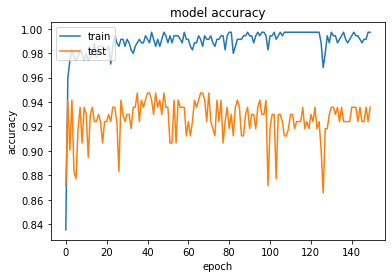

In [20]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

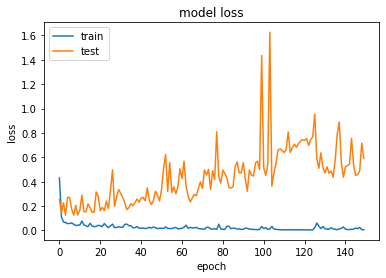

In [18]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()